In [62]:
import pandas as pd
import seaborn as sns
import numpy as np

In [63]:
import warnings

warnings.filterwarnings('ignore')

In [64]:
titanic = pd.read_csv('titanic.csv')

In [65]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [66]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


#### Data cleaning

In [67]:
titanic['age'].mean()
titanic['age'].fillna(titanic['age'].mean())
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())

In [68]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [69]:
titanic['embarked'].isna()
index = titanic[titanic['embarked'].isna()].index

titanic.drop(index,inplace=True)

In [70]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  deck         201 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        889 non-null    object 
 14  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 99.0+ KB


In [71]:
titanic.drop('deck',axis=1,inplace=True)

In [72]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  embark_town  889 non-null    object 
 12  alive        889 non-null    object 
 13  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 92.0+ KB


#### Features Selection

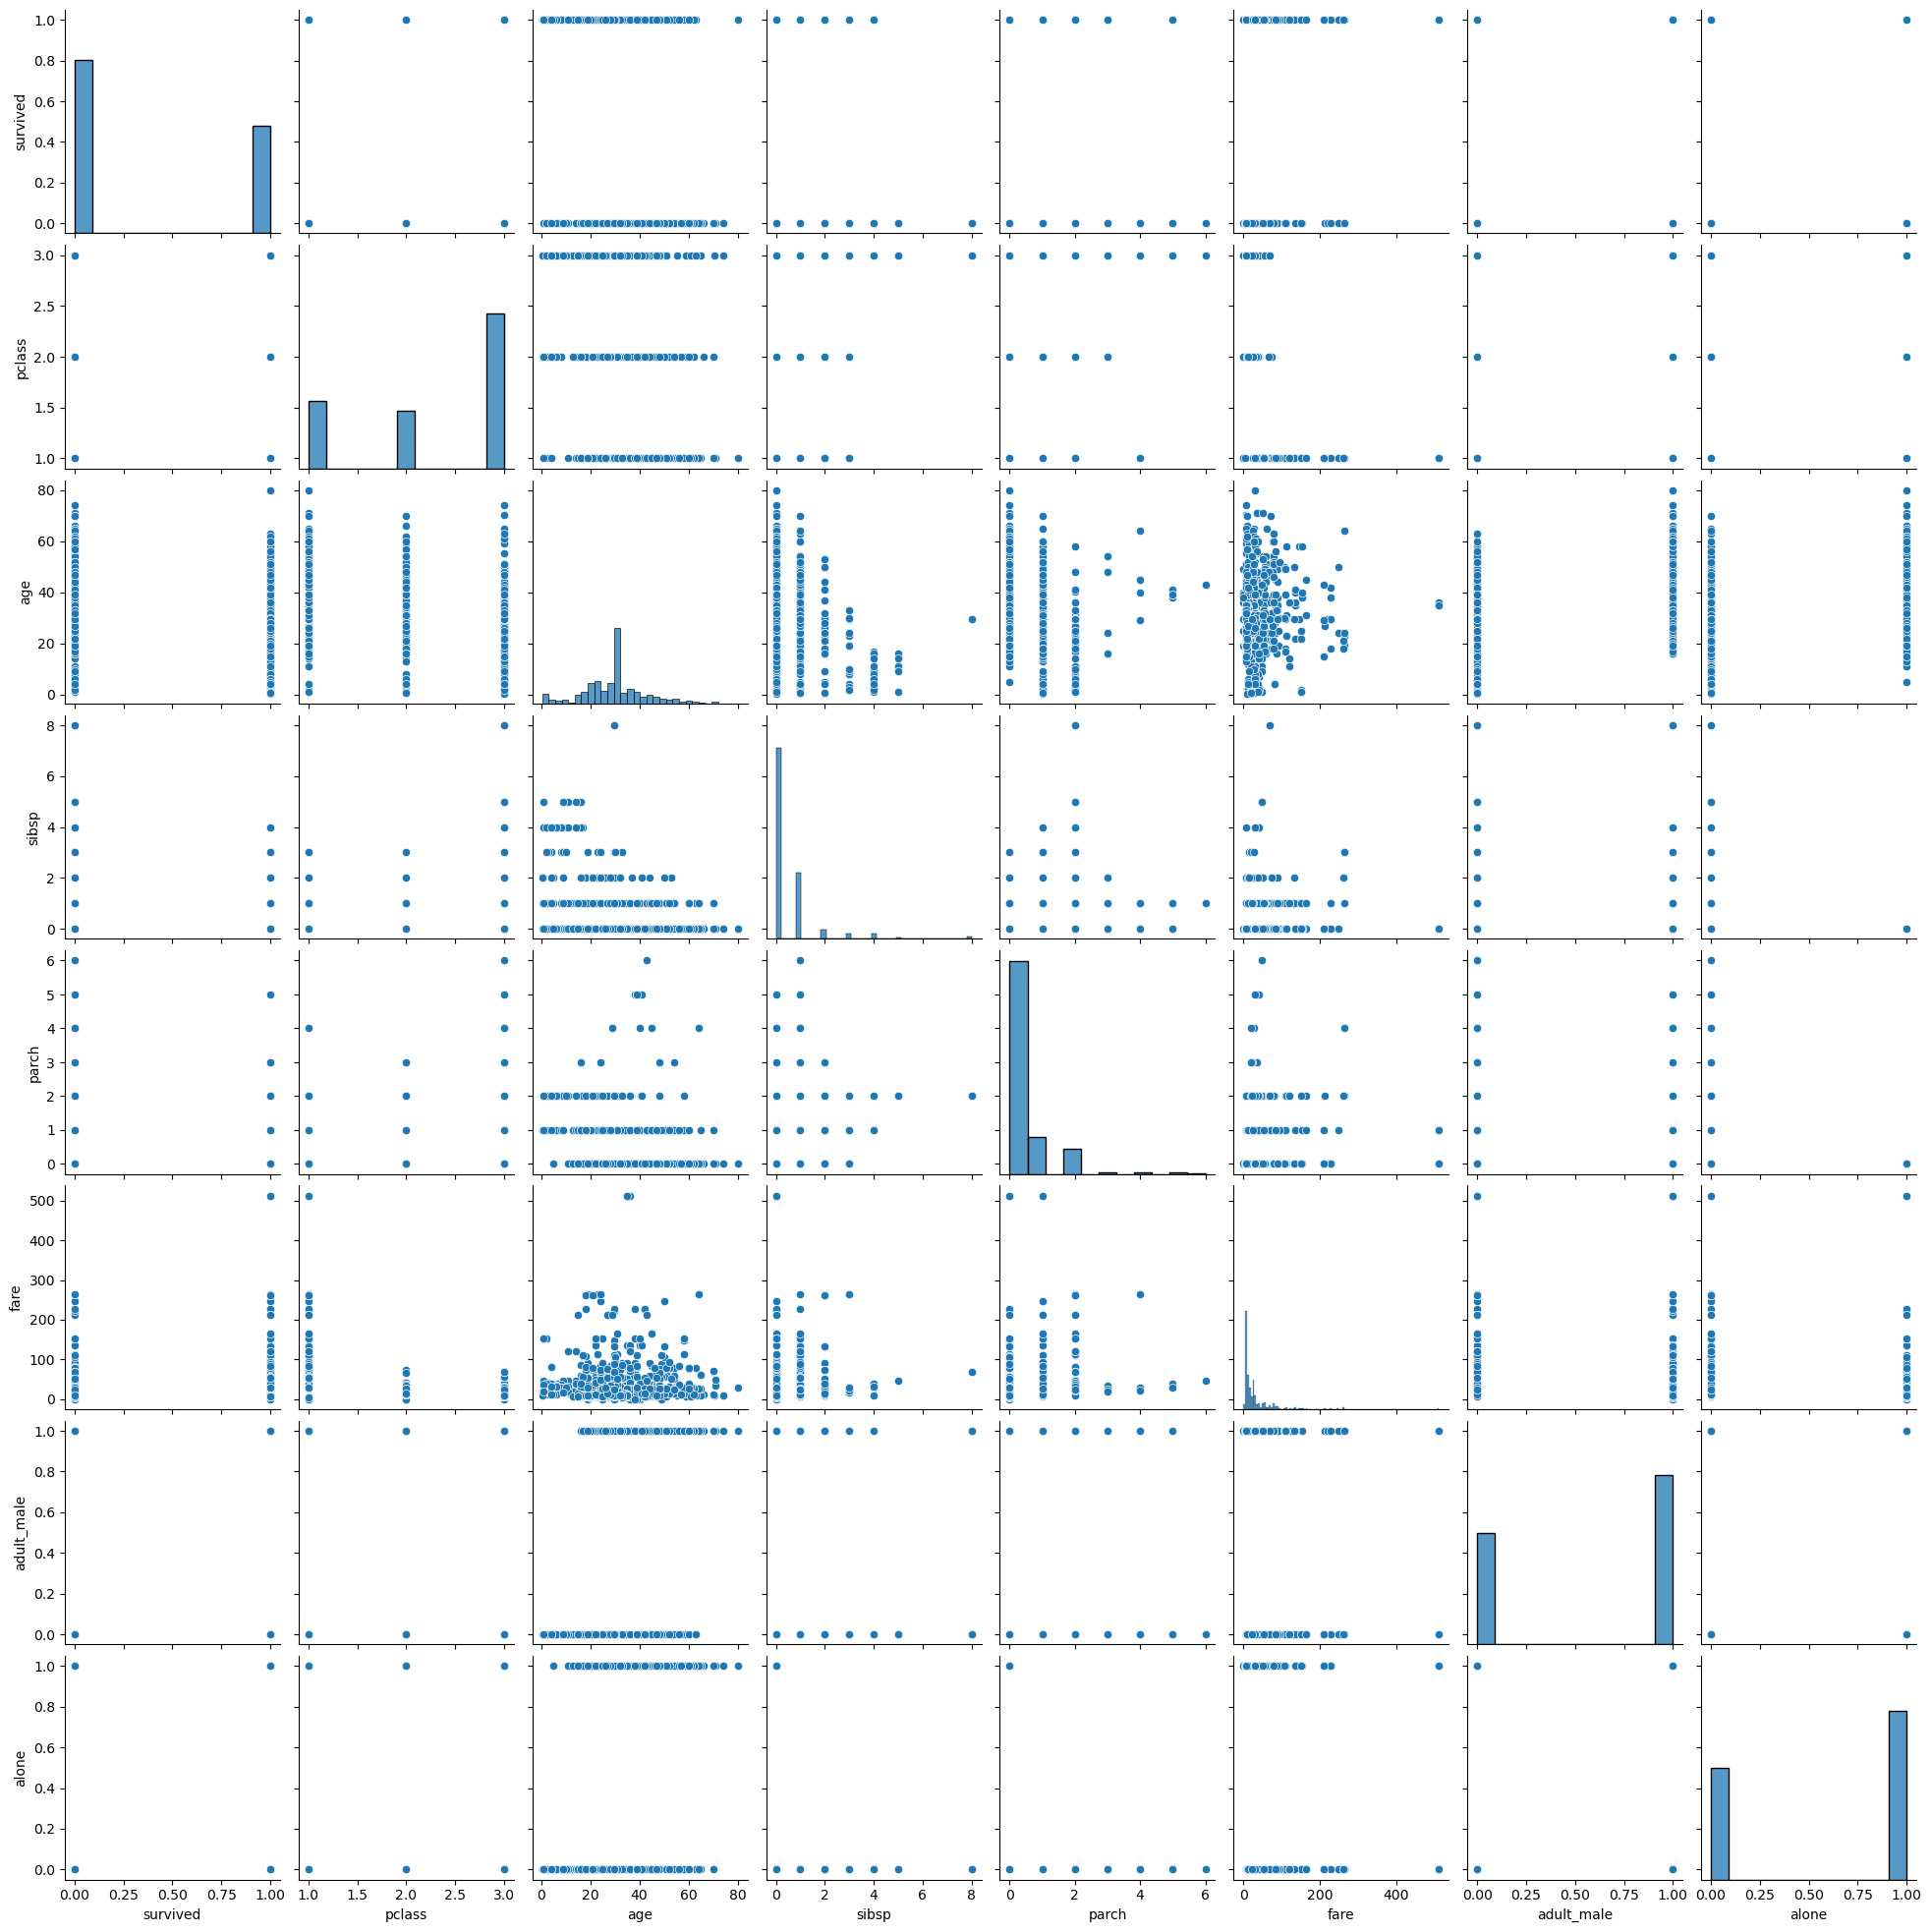

In [73]:
sns.pairplot(titanic)

In [74]:
y = titanic['survived']

In [75]:
x = titanic.drop(['survived', 'who', 'adult_male', 'alive', 'alone'],axis=1)

In [76]:
x

,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town
0,3,male,22.000000,1,0,7.2500,S,Third,Southampton
1,1,female,38.000000,1,0,71.2833,C,First,Cherbourg
2,3,female,26.000000,0,0,7.9250,S,Third,Southampton
3,1,female,35.000000,1,0,53.1000,S,First,Southampton
4,3,male,35.000000,0,0,8.0500,S,Third,Southampton
...,...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S,Second,Southampton
887,1,female,19.000000,0,0,30.0000,S,First,Southampton
888,3,female,29.699118,1,2,23.4500,S,Third,Southampton
889,1,male,26.000000,0,0,30.0000,C,First,Cherbourg


#### Splitting data into training and testing

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [79]:
x_train

,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town
376,3,female,22.000000,0,0,7.2500,S,Third,Southampton
458,2,female,50.000000,0,0,10.5000,S,Second,Southampton
732,2,male,29.699118,0,0,0.0000,S,Second,Southampton
507,1,male,29.699118,0,0,26.5500,S,First,Southampton
830,3,female,15.000000,1,0,14.4542,C,Third,Cherbourg
...,...,...,...,...,...,...,...,...,...
107,3,male,29.699118,0,0,7.7750,S,Third,Southampton
271,3,male,25.000000,0,0,0.0000,S,Third,Southampton
862,1,female,48.000000,0,0,25.9292,S,First,Southampton
436,3,female,21.000000,2,2,34.3750,S,Third,Southampton


#### Feature engineering

In [80]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [81]:
label = LabelEncoder()

In [82]:
print(titanic['class'])

x['class_label'] = label.fit_transform(titanic['class'])

x.head()

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: class, Length: 889, dtype: object


,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,class_label
0,3,male,22.0,1,0,7.2500,S,Third,Southampton,2
1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0
2,3,female,26.0,0,0,7.9250,S,Third,Southampton,2
3,1,female,35.0,1,0,53.1000,S,First,Southampton,0
4,3,male,35.0,0,0,8.0500,S,Third,Southampton,2


In [83]:
onehot = OneHotEncoder(sparse=False)

In [84]:
onehot.fit_transform(titanic[[  'sex'  ]])

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [85]:
pd.get_dummies(titanic[['sex', 'embarked', 'embark_town']])

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,False,True,False,False,True,False,False,True
1,True,False,True,False,False,True,False,False
2,True,False,False,False,True,False,False,True
3,True,False,False,False,True,False,False,True
4,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...
886,False,True,False,False,True,False,False,True
887,True,False,False,False,True,False,False,True
888,True,False,False,False,True,False,False,True
889,False,True,True,False,False,True,False,False


In [86]:
pd.get_dummies(x[['sex', 'embarked', 'embark_town']],dtype=int)

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,1,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,1
3,1,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,0,1
887,1,0,0,0,1,0,0,1
888,1,0,0,0,1,0,0,1
889,0,1,1,0,0,1,0,0


In [87]:
encoded = pd.get_dummies(x[['sex', 'embarked', 'embark_town']],dtype=int,drop_first=True)

In [88]:
encoded

,sex_male,embarked_Q,embarked_S,embark_town_Queenstown,embark_town_Southampton
0,1,0,1,0,1
1,0,0,0,0,0
2,0,0,1,0,1
3,0,0,1,0,1
4,1,0,1,0,1
...,...,...,...,...,...
886,1,0,1,0,1
887,0,0,1,0,1
888,0,0,1,0,1
889,1,0,0,0,0


In [89]:
x = pd.concat([x,encoded],axis=1)

In [90]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,class_label,sex_male,embarked_Q,embarked_S,embark_town_Queenstown,embark_town_Southampton
0,3,male,22.0,1,0,7.2500,S,Third,Southampton,2,1,0,1,0,1
1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0,0,0,0,0
2,3,female,26.0,0,0,7.9250,S,Third,Southampton,2,0,0,1,0,1
3,1,female,35.0,1,0,53.1000,S,First,Southampton,0,0,0,1,0,1
4,3,male,35.0,0,0,8.0500,S,Third,Southampton,2,1,0,1,0,1


In [91]:
x.drop(  ['sex', 'class', 'embark_town', 'embarked'],  axis=1,inplace=True)

In [92]:
x.head()

,pclass,age,sibsp,parch,fare,class_label,sex_male,embarked_Q,embarked_S,embark_town_Queenstown,embark_town_Southampton
0,3,22.0,1,0,7.2500,2,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,3,26.0,0,0,7.9250,2,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,1,0,1
4,3,35.0,0,0,8.0500,2,1,0,1,0,1


#### Splitting into training and testing

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [95]:
x_train

,pclass,age,sibsp,parch,fare,class_label,sex_male,embarked_Q,embarked_S,embark_town_Queenstown,embark_town_Southampton
376,3,22.000000,0,0,7.2500,2,0,0,1,0,1
458,2,50.000000,0,0,10.5000,1,0,0,1,0,1
732,2,29.699118,0,0,0.0000,1,1,0,1,0,1
507,1,29.699118,0,0,26.5500,0,1,0,1,0,1
830,3,15.000000,1,0,14.4542,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
107,3,29.699118,0,0,7.7750,2,1,0,1,0,1
271,3,25.000000,0,0,0.0000,2,1,0,1,0,1
862,1,48.000000,0,0,25.9292,0,0,0,1,0,1
436,3,21.000000,2,2,34.3750,2,0,0,1,0,1


#### Algorithm selection

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
Titanic_model = LogisticRegression()

In [98]:
Titanic_model.fit(x_train, y_train)

LogisticRegression()

In [100]:
predictions = Titanic_model.predict(x_test)

In [101]:
predictions

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [110]:
table = pd.DataFrame(predictions,columns=['Predicitons'])
y_test.reset_index(drop=True)
table['y_test'] = y_test.reset_index(drop=True)
table

,Predicitons,y_test
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
218,0,0
219,1,0
220,0,0
221,1,1


### evaluation

In [114]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [103]:
confusion_matrix(y_test,predictions)

array([[114,  27],
       [ 22,  60]], dtype=int64)

<Axes: >

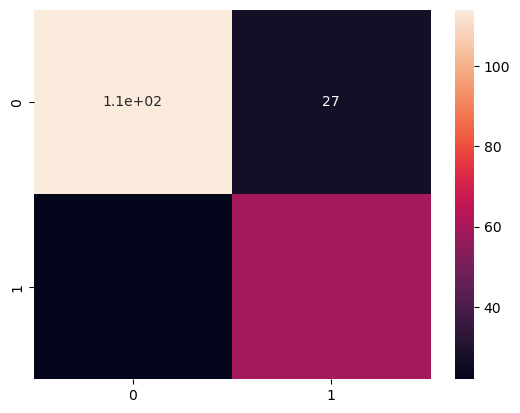

In [105]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [113]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       141
           1       0.69      0.73      0.71        82

    accuracy                           0.78       223
   macro avg       0.76      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



In [115]:
accuracy_score(y_test,predictions)

0.7802690582959642

In [116]:
import joblib

In [119]:
joblib.dump(Titanic_model, 'Titanic_model.pkl')

['Titanic_model.pkl']